# Case Study_Human Resourse Dataset

* <b>Human_Resources.csv<b/> Analysis
* Apply K mean Clustering
* Apply PCA
* Apply Autoencoder

## Task 1:Import your libraries (Lab 2)

In [3]:
#Import the libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
#Attach the Human_Resource.csv file and view the first five records
df = pd.read_csv('Human_Resources.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# show all the file data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Show the following basic statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Task 2: Visualize Dataset (Lab 2)

In [8]:
# Replace 'Attritition','Overtime' and 'Over18' columns with integers before performing any visualizations
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Over18'] = df['Over18'].map({'Y': 1})

In [9]:
# display the current first four records
df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


In [10]:
# Drop EmployeeNumber',EmployeeCount' ,'Standardhours' and 'Over18' since they do not change from one employee to the other
df.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [11]:
# Let's see how many employees left the company!
left_df        = df[df['Attrition'] == 1]
stayed_df      = df[df['Attrition'] == 0]

In [12]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset
total = len(df)

num_left = len(left_df)
pct_left = (num_left / total) * 100

num_stayed = len(stayed_df)
pct_stayed = (num_stayed / total) * 100

print(f"Total = {total}")
print(f"Number of employees who left the company = {num_left}")
print(f"Percentage of employees who left the company = {pct_left} %")
print(f"Number of employees who did not leave the company (stayed) = {num_stayed}")
print(f"Percentage of employees who did not leave the company (stayed) = {pct_stayed} %")

Total = 1470
Number of employees who left the company = 237
Percentage of employees who left the company = 16.122448979591837 %
Number of employees who did not leave the company (stayed) = 1233
Percentage of employees who did not leave the company (stayed) = 83.87755102040816 %


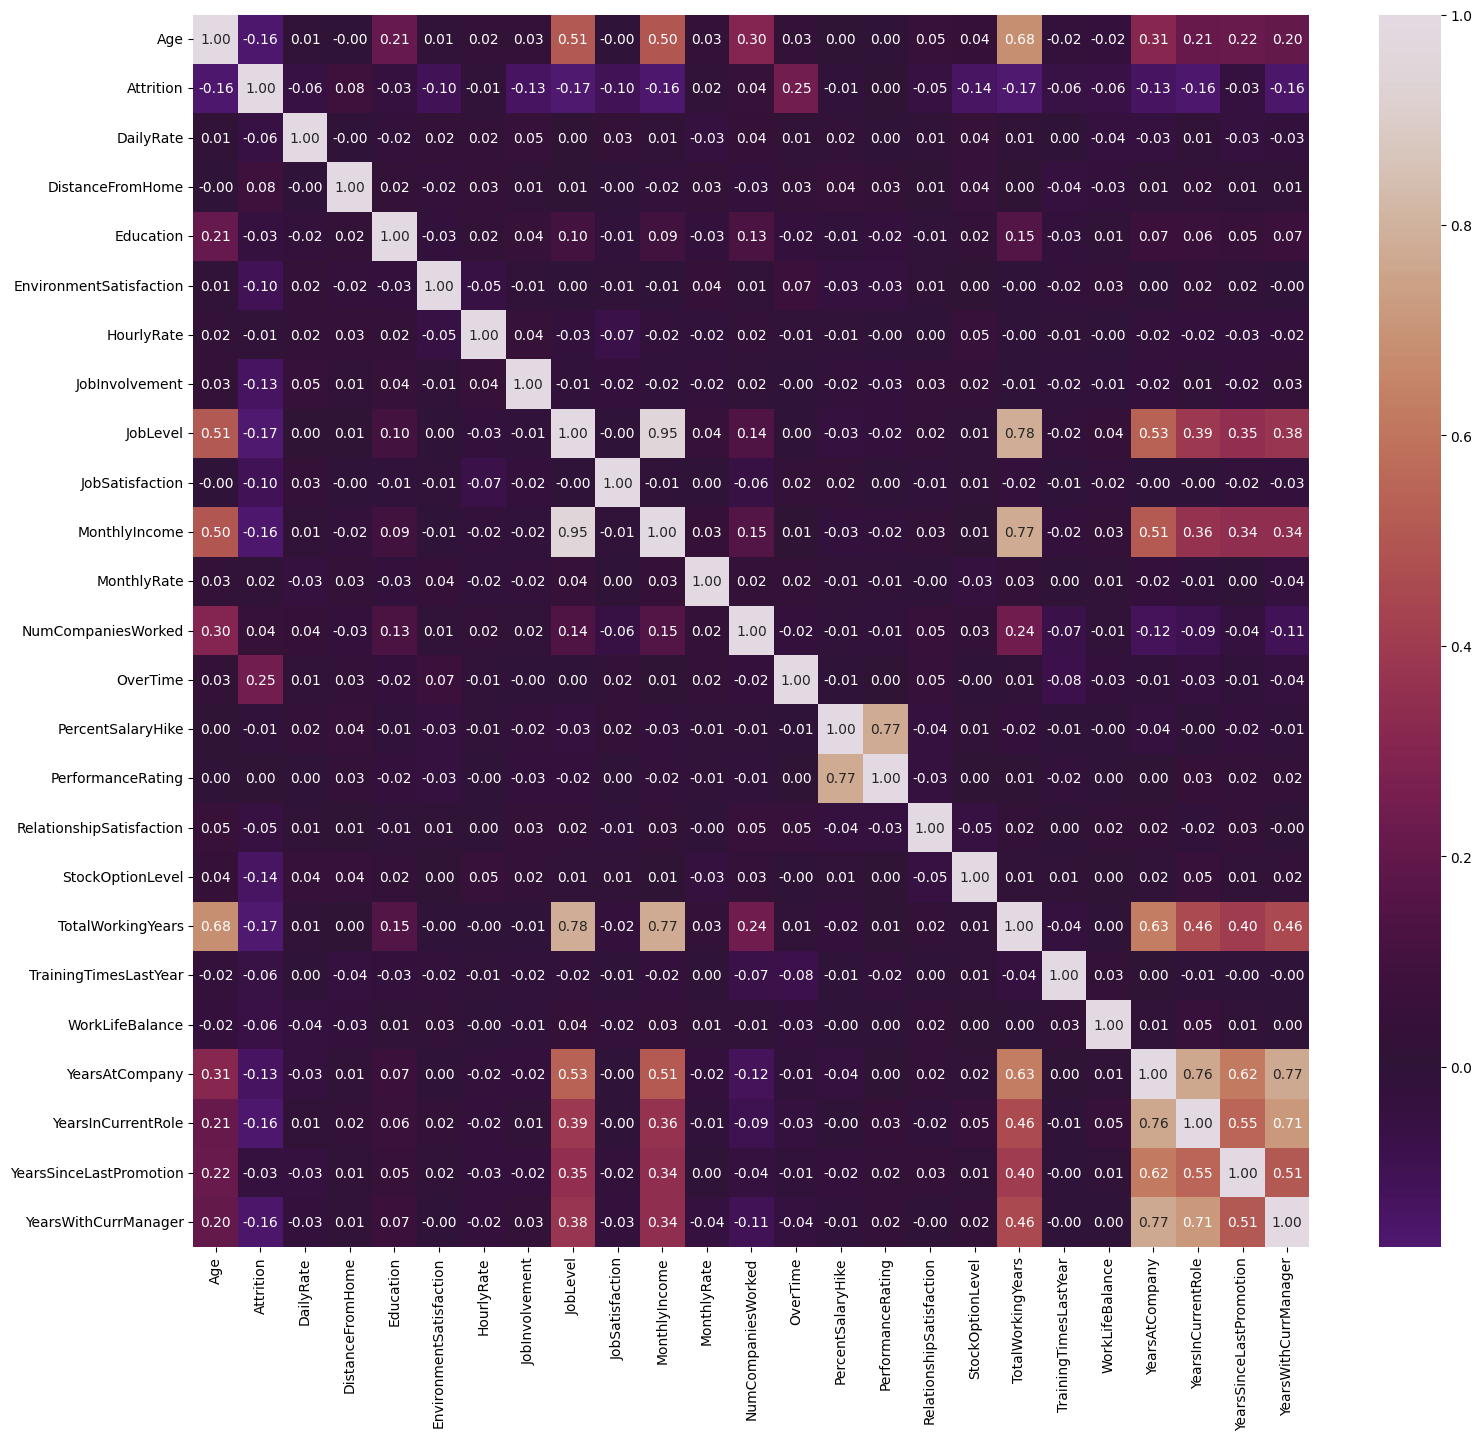

In [13]:
# show the correlation heat map as below
plt.figure(figsize=(18, 16))

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='twilight', center=0)
plt.show()



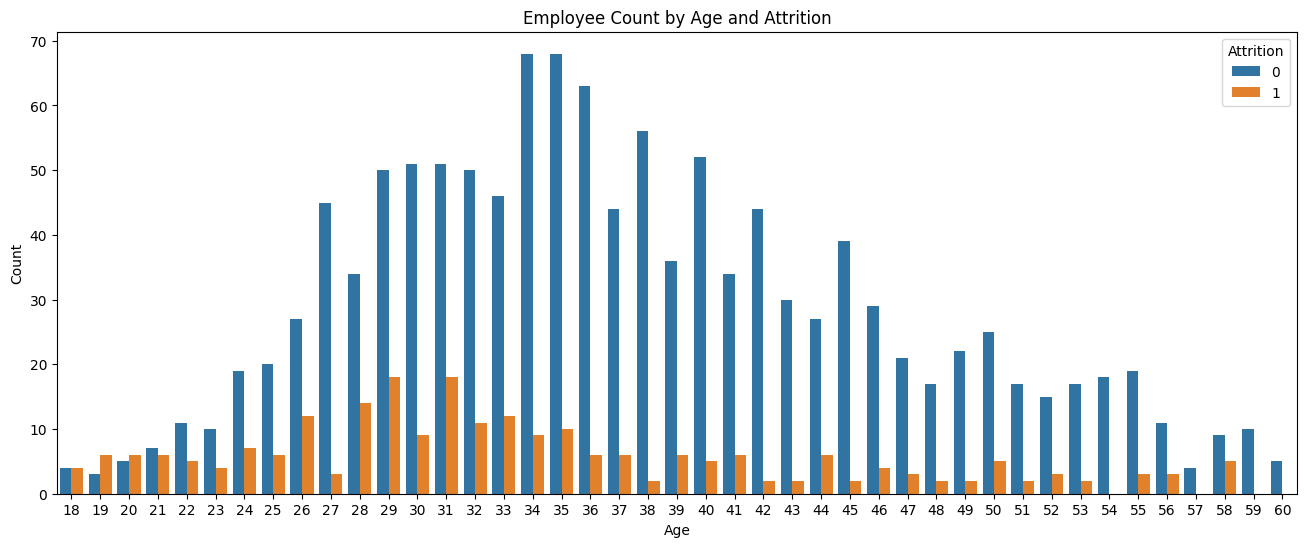

In [14]:
# Display the below visualization with hue as Attrition
plt.figure(figsize=(16, 6))

sns.countplot(data=df, x='Age', hue='Attrition')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Employee Count by Age and Attrition')
plt.show()

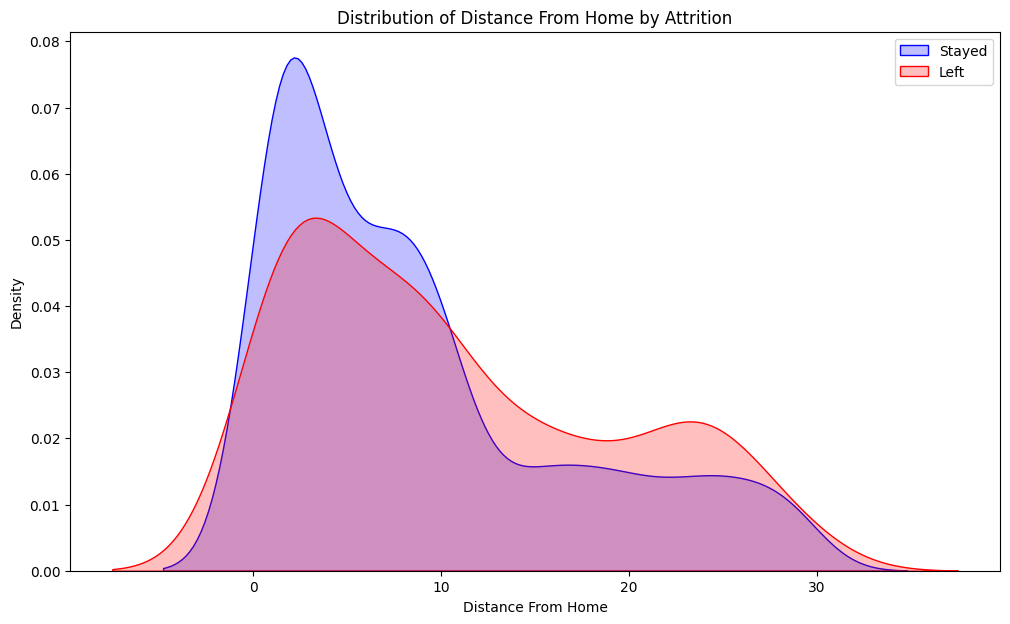

In [15]:
# create a Kernel Density Estimate comparing 'Employees who left' and 'Employees who Stayed' using 'Distance From Home'
plt.figure(figsize=(12,7))
sns.kdeplot(df[df['Attrition'] == 0]['DistanceFromHome'], color='blue', fill=True, label='Stayed')

sns.kdeplot(df[df['Attrition'] == 1]['DistanceFromHome'], color='red', fill=True, label='Left')

plt.title('Distribution of Distance From Home by Attrition')
plt.xlabel('Distance From Home')
plt.ylabel('Density')
plt.legend()
plt.show()

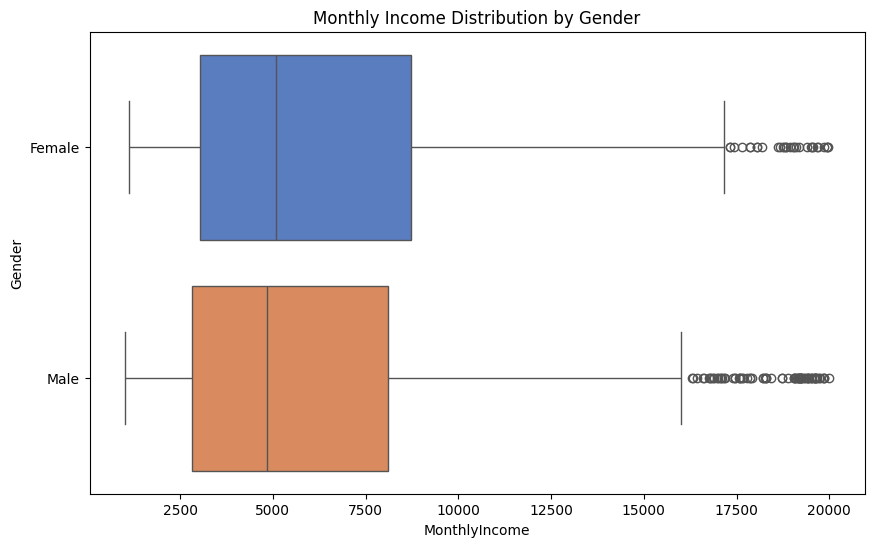

In [16]:
# Let's see the Gender vs. Monthly Income using box plots
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='MonthlyIncome', y='Gender', hue='Gender', palette='muted', dodge=False)
plt.title('Monthly Income Distribution by Gender')
plt.xlabel('MonthlyIncome')
plt.ylabel('Gender')
plt.show()

## Task 3: Create Testing and Training Dataset & Perform Data Cleaning (Lab 2)

In [18]:
# Convert the categorical fields into numerics using OneHotEncoder
categorical_cols = df.select_dtypes(include='object').columns.tolist()

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_array = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

df_encoded = pd.concat([df.drop(columns=categorical_cols).reset_index(drop=True), encoded_df], axis=1)

In [19]:
# select your features here i.e. drop the target 'Atrittion'
X = df_encoded.drop(columns=['Attrition'])

X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27,591,2,1,1,40,3,1,2,3468,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,613,6,1,4,42,2,3,1,9991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,155,4,3,2,87,4,2,2,6142,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [20]:
# scale your features data assigning it variable X
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.24462499,
        -0.91892141,  1.45864991],
       [ 1.32236521, -1.2977746 , -0.14714972, ..., -0.24462499,
         1.08823234, -0.68556546],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.24462499,
        -0.91892141,  1.45864991],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ..., -0.24462499,
         1.08823234, -0.68556546],
       [ 1.32236521,  0.54667746, -0.88751511, ..., -0.24462499,
         1.08823234, -0.68556546],
       [-0.32016256, -0.43256792, -0.14714972, ..., -0.24462499,
         1.08823234, -0.68556546]])

In [22]:
# select your dependent, target or response data as "Attrition" using variable y
y = df_encoded['Attrition']

In [23]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Task 4: Find the Optimal Number of Clusters using Elblow Method (Lab 2)

In [25]:
# Compute 'within cluster sum of squares' or WCSS metric for a range of k clusters
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=5503)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

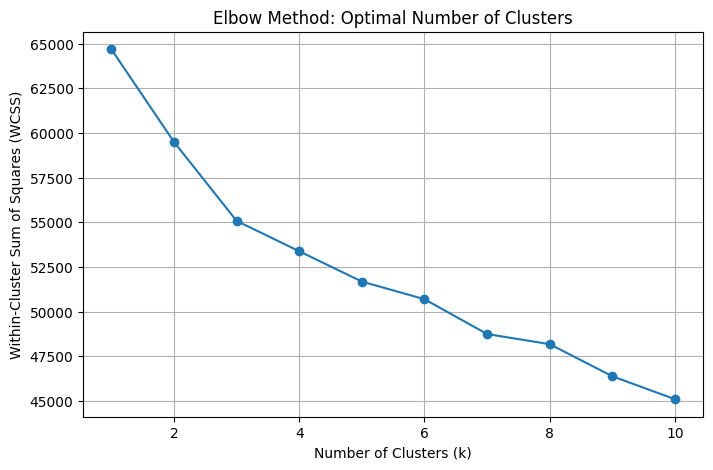

In [26]:
# Create a visualization for Finding the right number of clusters - Elbow method'
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


## Task 5: Apply K-Means Clustering (Lab 2)

In [28]:
optimal_k = 3


In [29]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=5503)
y_kmeans = kmeans.fit_predict(X)

In [30]:
unique, counts = np.unique(y_kmeans, return_counts=True)

In [31]:
# Check size of each cluster - Are they all representative ?

In [32]:
for cluster, size in zip(unique, counts):
    print(f"Cluster {cluster}: {size} points")

Cluster 0: 251 points
Cluster 1: 399 points
Cluster 2: 820 points


### Are they all representative ?

- Cluster 0: 251 points
- Cluster 1: 399 points
- Cluster 2: 820 points

All clusters contain a substantial number of data points. Therefore, all the clusters are considered representative of the dataset.

## Task 6: Apply PCA and Visualize Results (Lab 3)


In [35]:
# Obtain the principal components
pca = PCA()
X_pca = pca.fit_transform(X)

In [36]:
# All samples projected on the two principal components
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X)

In [37]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])

In [38]:
# Concatenate the clusters labels to the dataframe
pca_df['Cluster'] = y_kmeans

In [39]:
pca_df.head()

,PC1,PC2,Cluster
0,-0.034512,2.271801,1
1,0.097444,-1.569353,2
2,-2.871946,-0.993176,2
3,-1.222608,-1.126880,2
4,-2.075628,-1.211932,2


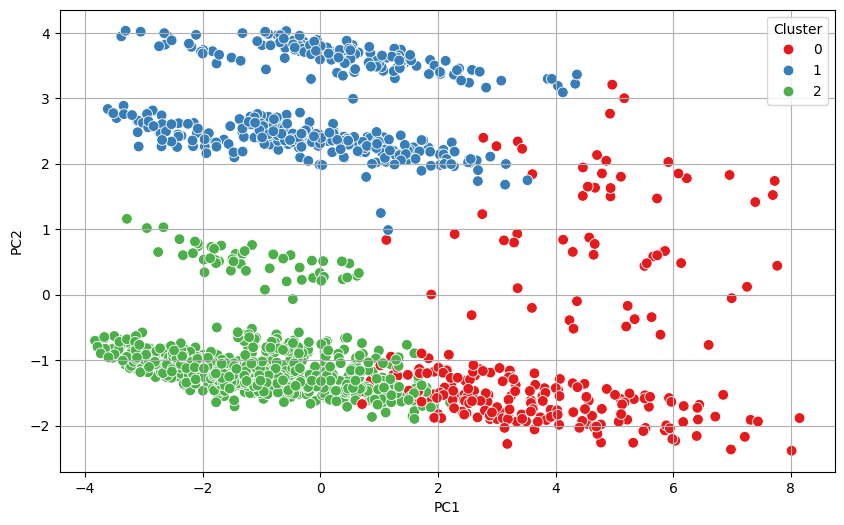

In [40]:
# Create a scatterplot visual of Projection of the dataset on the 2 PCA dimensions'
plt.figure(figsize=(10, 6))

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [41]:
# show the % of the total variance explained by each principal component. Overall close to 48% explained by these two.
explained_var = pca.explained_variance_ratio_
print(f"PC1 explains: {explained_var[0] * 100:.2f}% of variance")
print(f"PC2 explains: {explained_var[1] * 100:.2f}% of variance")
print(f"Total variance explained by first 2 PCs: {explained_var[:2].sum() * 100:.2f}%")

PC1 explains: 12.13% of variance
PC2 explains: 7.85% of variance
Total variance explained by first 2 PCs: 19.98%


## Task 7: Perform Dimensionality Reduction using Autoencoders (Lab 3)

In [43]:
#import the autoencoder libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

2025-05-25 01:25:59.323727: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [44]:
# create your autoencoder with all the features showing Encoder, bottleneck, decoder, autoencoder
# compile the autoencoder using optimizer='adam', loss='mean_squared_error'


# Input diamention
input_dim = X.shape[1]

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)

# Bottleneck
bottleneck = Dense(8, activation='relu')(encoded)

# Decoder
decoded = Dense(16, activation='relu')(bottleneck)
decoded = Dense(32, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Autoencoder
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
# show the autoencoder summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 44)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 44)             │         1,452 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,244 (16.58 KB)

 Trainable params: 4,244 (16.58 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
## Train autoencoder using input = output
history = autoencoder.fit(
    X, X,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.0132 - val_loss: 0.9672
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9896 - val_loss: 0.9307
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9290 - val_loss: 0.8809
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8669 - val_loss: 0.8295
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8258 - val_loss: 0.7863
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7702 - val_loss: 0.7622
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7438 - val_loss: 0.7468
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7344 - val_loss: 0.7338
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7351 - val_loss: 0.7196
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7126 - val_loss: 0.7073
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6996 - val_loss: 0.6950
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6833 - val_lo

In [47]:
# Use Autoencoder to reduce the number of features / dimensions and show the dimensions
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=3).output)

X_encoded = encoder.predict(X)

print("Original shape:", X.shape)
print("Reduced shape:", X_encoded.shape)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Original shape: (1470, 44)
Reduced shape: (1470, 8)


## Task 8: Apply KMEANS to encoded dataset (Lab 3)

In [49]:
# Apply KMEANS to encoded dataset here
kmeans_encoded = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans_encoded = kmeans_encoded.fit_predict(X_encoded)

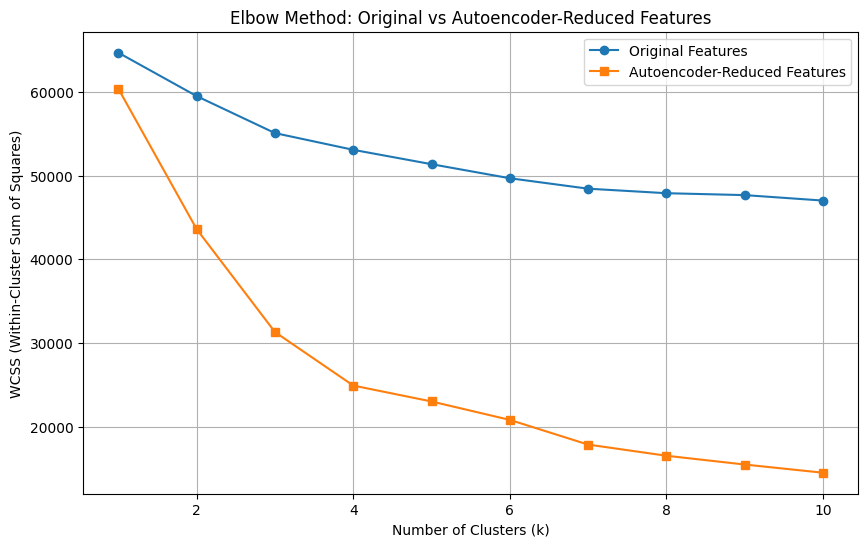

In [50]:
# create a line plot to show the " Pick optimal number of clusters using Elbow method" of the unreduced and reduced dimension Kmeans features
wcss_original = []
wcss_encoded = []

for k in range(1, 11):
    kmeans_orig = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_orig.fit(X)
    wcss_original.append(kmeans_orig.inertia_)

    kmeans_enc = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_enc.fit(X_encoded)
    wcss_encoded.append(kmeans_enc.inertia_)

plt.figure(figsize=(10, 6))

plt.plot(range(1, 11), wcss_original, marker='o', label='Original Features')
plt.plot(range(1, 11), wcss_encoded, marker='s', label='Autoencoder-Reduced Features')

plt.title('Elbow Method: Original vs Autoencoder-Reduced Features')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
## Apply the resulting optimal k to find new centroids
optimal_k = 3

kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_final.fit(X_encoded)

centroids = kmeans_final.cluster_centers_

In [52]:
## Show the centroids shape
print("Centroids shape:", kmeans_final.cluster_centers_.shape)

Centroids shape: (3, 8)


In [53]:
# show the clusters shape
print("Cluster assignments shape:", y_kmeans_encoded.shape)

Cluster assignments shape: (1470,)


In [54]:
# concatenate the clusters to the data
compressed_df = pd.DataFrame(X_encoded, columns=[f'Feature_{i}' for i in range(X_encoded.shape[1])])
compressed_df['Cluster'] = y_kmeans_encoded
compressed_df.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Cluster
0,1.568441,1.241364,0.593133,5.113352,2.302389,0.0,4.245976,7.492687,2
1,2.842677,0.955184,7.441913,2.292350,1.647639,0.0,5.434120,2.644839,0
2,1.698309,4.492142,8.864400,2.963076,6.616045,0.0,5.660383,4.766809,0
3,2.879568,4.075821,8.686769,5.247334,4.044940,0.0,8.881424,5.491131,0
4,1.023033,2.681492,6.395910,1.777609,4.102526,0.0,2.958478,3.924850,0


In [55]:
# show the 'Number of samples" in your current consolidated
print("Number of samples:", compressed_df.shape[0])

Number of samples: 1470


In [56]:
## Apply PCA to encoded dataset
pca_encoded = PCA(n_components=2)
X_pca_encoded = pca_encoded.fit_transform(X_encoded)

In [57]:
# concatenate the clusters to the data
pca_encoded_df = pd.DataFrame(X_pca_encoded, columns=['PC1', 'PC2'])
pca_encoded_df['Cluster'] = y_kmeans_encoded

In [58]:
## Apply PCA to encoded dataset

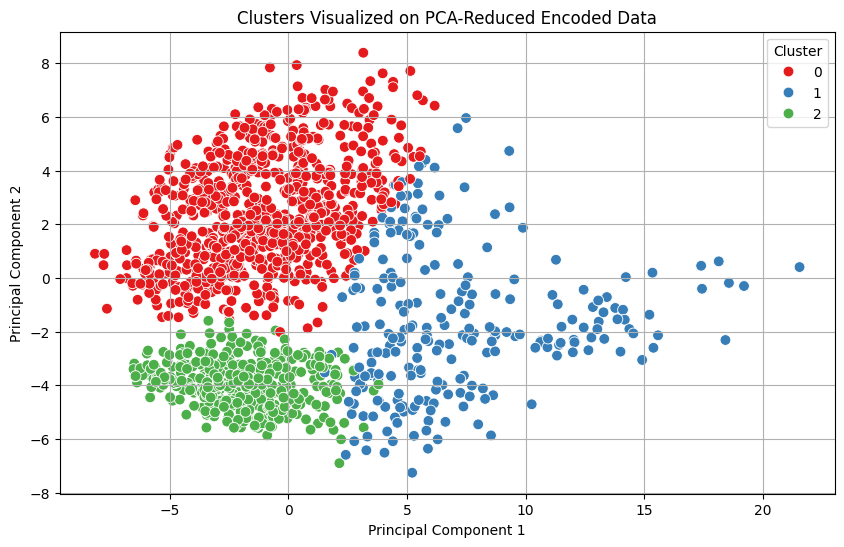

In [59]:
## Plot your pca scatterplot with clusters as the hue
plt.figure(figsize=(10, 6))

sns.scatterplot(data=pca_encoded_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.title('Clusters Visualized on PCA-Reduced Encoded Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()